## Information Retrieval and Web Analytics


Team:
- Edith Ruiz, 242324
- Montserrat Sumoy, 241061
- Martina Tarres, 242828


## Part 1: Text Processing and Exploratory Data Analysis

**1) As a first step, you must pre-process the documents by**
- Removing stop words
- Tokenization
- Removing punctuation marks
- Stemming
- and... anything else you think it's needed (bonus point)

In [1]:
# Mount your google drive account here
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
from datetime import datetime
import numpy as np
import collections
from numpy import linalg as la
import time
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [4]:
# Path to the json data file
# Change the path acording to your folders distribution to get file "Rus_Ukr_war_data.json"
docs_path = '/content/drive/MyDrive/uni/Recuperacio Informacio/IRWA - Labs/IRWA_data_2023/Rus_Ukr_war_data.json'

with open(docs_path) as fp:
    lines = fp.readlines()
lines = [l.strip().replace(' +', ' ') for l in lines]

data = [json.loads(line) for line in open(docs_path, 'r')]

In [5]:
print("Total number of Tweets articles in the corpus: {}".format(len(lines)))

Total number of Tweets articles in the corpus: 4000


In [6]:
df_prova = pd.DataFrame.from_dict(data)
doc_ids = pd.read_csv('Rus_Ukr_war_data_ids.csv', names=['doc_id']) # Reading the tweet_document_ids_map
df_final_prova = pd.merge(doc_ids, df_prova, left_index=True, right_index=True) # Mapping the tweets with the document ids
df_final_prova

,doc_id,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,doc_1\t1575918221013979136,Fri Sep 30 18:39:17 +0000 2022,1575918221013979136,1575918221013979136,@MelSimmonsFCDO Wrong. Dictator Putin's Fascis...,False,"[16, 149]","{'hashtags': [{'text': 'RussiainvadesUkraine',...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,doc_2\t1575918081461080065,Fri Sep 30 18:38:44 +0000 2022,1575918081461080065,1575918081461080065,🇺🇦❤️ The Armed Forces liberated the village of...,False,"[0, 265]","{'hashtags': [{'text': 'Drobysheve', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,en,"{'media': [{'id': 1575918030638530581, 'id_str...",False,NaN,NaN,NaN,NaN
2,doc_3\t1575917992390823936,Fri Sep 30 18:38:23 +0000 2022,1575917992390823936,1575917992390823936,ALERT 🚨Poland preps anti-radiation tablets ove...,False,"[0, 133]","{'hashtags': [{'text': 'NATO', 'indices': [64,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,doc_4\t1575917907774967809,Fri Sep 30 18:38:03 +0000 2022,1575917907774967809,1575917907774967809,I’m still waiting for my google map 🗺️ to upda...,False,"[0, 151]","{'hashtags': [{'text': 'Putin', 'indices': [12...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,doc_5\t1575917878410301441,Fri Sep 30 18:37:56 +0000 2022,1575917878410301441,1575917878410301441,@EmmanuelMacron probably you're right or you h...,False,"[16, 157]","{'hashtags': [{'text': 'European', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,doc_3996\t1575154617620504576,Wed Sep 28 16:05:00 +0000 2022,1575154617620504576,1575154617620504576,🎥 Ukraine’s president has warned that Russia’s...,False,"[0, 219]","{'hashtags': [{'text': 'UkraineRussiaWar', 'in...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",...,4,False,False,en,"{'media': [{'id': 1575134285912326145, 'id_str...",False,NaN,NaN,NaN,NaN
3996,doc_3997\t1575154444165156864,Wed Sep 28 16:04:19 +0000 2022,1575154444165156864,1575154444165156864,Germany amusingly shares days old intelligense...,False,"[0, 245]","{'hashtags': [{'text': 'germany', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,en,NaN,False,NaN,NaN,NaN,NaN
3997,doc_3998\t1575154440012812288,Wed Sep 28 16:04:18 +0000 2022,1575154440012812288,1575154440012812288,The US Embassy in Moscow is urging Americans t...,False,"[0, 279]","{'hashtags': [{'text': 'fakenewsfilter', 'indi...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,0,False,False,en,"{'media': [{'id': 1575153247299444736, 'id_str...",False,NaN,NaN,NaN,NaN
3998,doc_3999\t1575154351273873410,Wed Sep 28 16:03:56 +0000 2022,1575154351273873410,1575154351273873410,After the staged fake referendum as of Septemb...,False,"[0, 279]","{'hashtags': [{'text': 'UkraineRussiaWar', 'in...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,13,False,False,en,"{'media': [{'id': 1575154341492711425, 'id_str...",False,NaN,NaN,NaN,NaN


In [7]:
sep12 = df_final_prova["doc_id"].str.split(pat = '\t',expand = True) # the split elements will expand out into separate columns
docID = sep12[0]
tweetID = sep12[1]
df_final_prova["doc_id"] = docID
df_final_prova["tweet_id"] = tweetID

**PRE-PROCESS THE DOCUMENT**

In [8]:
def build_terms(line):

  stemmer = PorterStemmer()
  stop_words = set(stopwords.words('english'))
  line = line.lower()
  line = re.sub('http[s]?://\S+', '', line)            # Bonus: Remove urls
  line = re.sub('[\W_]+', ' ', line)                   # Bonus: Remove emojis, symbols...
  line = line.split()                                  # Tokenize the text to get a list of terms
  line = [x for x in line if x not in stop_words]      # Eliminate the stopwords
  line = [stemmer.stem(word) for word in line]         # Perform stemming

  return line

In [9]:
processed_data = []  # Create a list to store processed data

for i, tweet in enumerate(data):
    # Create a new dictionary for processed data
    processed_tweet = {}

    # Process and update the fields
    processed_tweet['Tweet'] = build_terms(tweet['full_text'])
    processed_tweet['Username'] = re.sub('[\W_]+', ' ', tweet['user']['name'])
    processed_tweet['Date'] = datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S %z %Y')
    processed_tweet['Hashtags'] = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]
    processed_tweet['Likes'] = tweet['favorite_count']
    processed_tweet['Retweets'] = tweet['retweet_count']
    processed_tweet['Url'] = tweet['entities']['media'][0]['url'] if tweet['entities'].get('media') else {}

    # Append the processed data to the list
    processed_data.append(processed_tweet)

    # Print both UNPROCESSED and PROCESSED data for the first 3 tweets
    if i < 3:
        print('\033[1m' + 'UNPROCESSED' + '\033[0m')
        print("{'Tweet':", repr(tweet['full_text']),
              "'Username':", repr(tweet['user']['name']),
              "'Date':", repr(tweet['created_at']),
              "'Hashtags':", repr(tweet['entities']['hashtags']),
              "'Likes':", repr(tweet['favorite_count']),
              "'Retweets':", repr(tweet['retweet_count']),
              "'Url':", repr(tweet['entities']['media'][0]['url'] if tweet['entities'].get('media') else {}),
              "}")

        print('\033[1m' + 'PROCESSED' + '\033[0m')
        print(processed_tweet, '\n')

# Update the original data with the processed data
data = processed_data


UNPROCESSED
{'Tweet': "@MelSimmonsFCDO Wrong. Dictator Putin's Fascist Russia intends to conquer as much Ukrainian Land as possible.\n#RussiainvadesUkraine\n#UkraineRussiaWar" 'Username': 'Lyn Wood🌹🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f☮️🇺🇦🌻🌹' 'Date': 'Fri Sep 30 18:39:17 +0000 2022' 'Hashtags': [{'text': 'RussiainvadesUkraine', 'indices': [110, 131]}, {'text': 'UkraineRussiaWar', 'indices': [132, 149]}] 'Likes': 0 'Retweets': 0 'Url': {} }
PROCESSED
{'Tweet': ['melsimmonsfcdo', 'wrong', 'dictat', 'putin', 'fascist', 'russia', 'intend', 'conquer', 'much', 'ukrainian', 'land', 'possibl', 'russiainvadesukrain', 'ukrainerussiawar'], 'Username': 'Lyn Wood ', 'Date': datetime.datetime(2022, 9, 30, 18, 39, 17, tzinfo=datetime.timezone.utc), 'Hashtags': ['RussiainvadesUkraine', 'UkraineRussiaWar'], 'Likes': 0, 'Retweets': 0, 'Url': {}} 

UNPROCESSED
{'Tweet': '🇺🇦❤️ The Armed Forces liberated the village of #Drobysheve of the #Lymansk urban territorial community in #Done

In [10]:
# Path to the data csv file
# Change the path acording to your folders distribution to get file "Rus_Ukr_war_data_ids.csv"
path_ids = '/content/drive/MyDrive/uni/Recuperacio Informacio/LAB 1/IRWA_data_2023/Rus_Ukr_war_data_ids.csv'

In [11]:
df = pd.DataFrame.from_dict(data)
doc_ids = pd.read_csv('Rus_Ukr_war_data_ids.csv', names=['doc_id']) # Reading the tweet_document_ids_map
df_final = pd.merge(doc_ids, df, left_index=True, right_index=True) # Mapping the tweets with the document ids
df_final

,doc_id,Tweet,Username,Date,Hashtags,Likes,Retweets,Url
0,doc_1\t1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Lyn Wood,2022-09-30 18:39:17+00:00,"[RussiainvadesUkraine, UkraineRussiaWar]",0,0,{}
1,doc_2\t1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Feher Junior,2022-09-30 18:38:44+00:00,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,0,https://t.co/ifg0RXDMBQ
2,doc_3\t1575917992390823936,"[alert, poland, prep, anti, radiat, tablet, nu...",NEWS ALL TIME,2022-09-30 18:38:23+00:00,"[NATO, Putin, Russia, RussiaInvadedUkraine, Uk...",0,0,{}
3,doc_4\t1575917907774967809,"[still, wait, googl, map, updat, russia, new, ...",Magz Prestige,2022-09-30 18:38:03+00:00,"[Putin, UkraineRussiaWar]",0,0,{}
4,doc_5\t1575917878410301441,"[emmanuelmacron, probabl, right, say, anyway, ...",t3zx9kc7rs1,2022-09-30 18:37:56+00:00,"[European, UkraineRussiaWar]",0,0,{}
...,...,...,...,...,...,...,...,...
3995,doc_3996\t1575154617620504576,"[ukrain, presid, warn, russia, sham, referendu...",Irish Daily Mirror,2022-09-28 16:05:00+00:00,[UkraineRussiaWar],4,1,https://t.co/Ld9SN2pz25
3996,doc_3997\t1575154444165156864,"[germani, amusingli, share, day, old, intellig...",Kaleva π,2022-09-28 16:04:19+00:00,"[germany, UkraineRussiaWar]",0,0,{}
3997,doc_3998\t1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",Oigetit Business,2022-09-28 16:04:18+00:00,"[fakenewsfilter, RealNews, news, RussianMobili...",0,0,https://t.co/uI4jNf1n18
3998,doc_3999\t1575154351273873410,"[stage, fake, referendum, septemb, 2022, russi...",Yusuf Adam,2022-09-28 16:03:56+00:00,[UkraineRussiaWar],13,2,https://t.co/XQOJq8b3M1


## Part 2: Index and Evaluation

In [12]:
sep1 = df_final["doc_id"].str.split(pat = '\t',expand = True)
docID = sep1[0]
tweetID = sep1[1]
df_final["doc_id"] = docID
df_final["tweet_id"] = tweetID

In [13]:
df_final = df_final.loc[:, ["doc_id","tweet_id","Tweet","Username","Date","Hashtags","Likes","Retweets","Url"]]
df_final

,doc_id,tweet_id,Tweet,Username,Date,Hashtags,Likes,Retweets,Url
0,doc_1,1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Lyn Wood,2022-09-30 18:39:17+00:00,"[RussiainvadesUkraine, UkraineRussiaWar]",0,0,{}
1,doc_2,1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Feher Junior,2022-09-30 18:38:44+00:00,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,0,https://t.co/ifg0RXDMBQ
2,doc_3,1575917992390823936,"[alert, poland, prep, anti, radiat, tablet, nu...",NEWS ALL TIME,2022-09-30 18:38:23+00:00,"[NATO, Putin, Russia, RussiaInvadedUkraine, Uk...",0,0,{}
3,doc_4,1575917907774967809,"[still, wait, googl, map, updat, russia, new, ...",Magz Prestige,2022-09-30 18:38:03+00:00,"[Putin, UkraineRussiaWar]",0,0,{}
4,doc_5,1575917878410301441,"[emmanuelmacron, probabl, right, say, anyway, ...",t3zx9kc7rs1,2022-09-30 18:37:56+00:00,"[European, UkraineRussiaWar]",0,0,{}
...,...,...,...,...,...,...,...,...,...
3995,doc_3996,1575154617620504576,"[ukrain, presid, warn, russia, sham, referendu...",Irish Daily Mirror,2022-09-28 16:05:00+00:00,[UkraineRussiaWar],4,1,https://t.co/Ld9SN2pz25
3996,doc_3997,1575154444165156864,"[germani, amusingli, share, day, old, intellig...",Kaleva π,2022-09-28 16:04:19+00:00,"[germany, UkraineRussiaWar]",0,0,{}
3997,doc_3998,1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",Oigetit Business,2022-09-28 16:04:18+00:00,"[fakenewsfilter, RealNews, news, RussianMobili...",0,0,https://t.co/uI4jNf1n18
3998,doc_3999,1575154351273873410,"[stage, fake, referendum, septemb, 2022, russi...",Yusuf Adam,2022-09-28 16:03:56+00:00,[UkraineRussiaWar],13,2,https://t.co/XQOJq8b3M1


### Indexing

#####**1) Build inverted index:** After having pre-processed the data, you can then create the inverted index.


In [14]:
def create_inverted_index(df_final, num_documents):
    """
    Implement the inverted index and compute tf, df and idf

    Argument:
    lines -- collection of Tweets
    num_documents -- total number of documents

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    lines = df_final['Tweet']
    index = defaultdict(list)
    tf = defaultdict(list)            #term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)             #document frequencies of terms in the corpus
    title_index = defaultdict(str)
    idf = defaultdict(float)

    for i, line in enumerate(lines):  #for each tweet in lines

        page_id = df_final['doc_id'][i]

        current_page_index = {}

        for position, term in enumerate(line):  #terms contains page_title + page_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term] = [page_id, array('I', [position])]  #'I' indicates unsigned int (int in Python)

        # normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document.
            # posting ==> [current_doc, [list of positions]]
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1]) / norm, 4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1 # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents / df[term])), 4)

    return index, tf, df, idf

In [15]:
index, tf, df, idf = create_inverted_index(df_final,len(df_final))
word = []
word_df = []
for item in df.items():
    word.append(item[0])
    word_df.append(item[1])

document_frequency_df = pd.DataFrame(list(zip(word,word_df)), columns=['Word', 'DF'])
document_frequency_df.sort_values(by='DF', ascending=False).head(20)

,Word,DF
13,ukrainerussiawar,4000
26,ukrain,2676
5,russia,1633
25,ukrainewar,1305
88,russian,1275
3,putin,916
9,ukrainian,823
41,nato,543
111,war,536
397,kherson,497


#####**2) Propose test queries:** Define five queries that will be used to evaluate your search
engine (e.g., “presidents visiting Kyiv”, “countries supporting Ukraine”)

To evaluate a search engine, it's important to choose a diverse set of queries that cover a range of topics and query structures. These queries should reflect common search scenarios that users might encounter. We are going to select terms based on the popularity.
This are our five queries:
- "Ukraine conflict hours and dates"
- "Presidents involved in Ukraine war"
- "Ukraine economic impact of war"
- "Kharkiv war damage photos and videos"
- "Countries supporting Ukraine"

#####**3) Rank your results:** Implement the TF-IDF algorithm and provide ranking based
results.

In [16]:
def rank_documents(terms, docs, index, idf, tf):
    """
    Perform the ranking of the results of a search based on the tf-idf weights.

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # TODO: check how to vectorize the query
        # query_vector[termIndex]=idf[term]  # original
        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex] = query_terms_count[term] / query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # term is in doc 26 in positions 1,4, .....
            #tf[term][0] will contain the tf of the term "term" in the doc 26

            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity see np.dot

    doc_scores = [[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items()]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    result_scores = [x[0] for x in doc_scores]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    return result_docs, result_scores

In [17]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the intersaction of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs = [posting[0] for posting in index[term]]

            # docs = docs Intersaction term_docs
            if len(docs) == 0:
              docs = set(term_docs)
            else:
              docs.intersaction(set(term_docs))
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs, result_scores = rank_documents(query, docs, index, idf, tf)
    return ranked_docs, result_scores

Let us test our queries and let us provide ranking based results.

In [18]:
queries = ["Ukraine conflict hours and dates", "Presidents involved in Ukraine war", "Ukraine economic impact of war", "Kharkiv war damage photos and videos", "Countries supporting Ukraine"]

ranked_docs = [0]*5
result_scores = [0]*5
i = 0
for query in queries:
  ranked_docs[i], result_scores[i] = search_tf_idf(query, index)
  top = 10
  print("\n======================\nTop {} results out of {} for the searched query {}:\n".format(top, len(ranked_docs[i]), query))

  j=0
  for j in range(len(ranked_docs[i])):
    if (j < top):
      print("page_id = {}\t score = {}".format(ranked_docs[i][j], result_scores[i][j]))
  i+=1


Top 10 results out of 2676 for the searched query Ukraine conflict hours and dates:

page_id = doc_3395	 score = 6.7426552687065
page_id = doc_3327	 score = 4.905772285212499
page_id = doc_3453	 score = 4.150492904831999
page_id = doc_2087	 score = 4.150492904831999
page_id = doc_291	 score = 4.128940715100501
page_id = doc_3107	 score = 3.5766620207239996
page_id = doc_3754	 score = 3.5612223488159995
page_id = doc_2444	 score = 3.5612223488159995
page_id = doc_2801	 score = 3.464108970695999
page_id = doc_698	 score = 3.378513371424

Top 10 results out of 86 for the searched query Presidents involved in Ukraine war:

page_id = doc_2394	 score = 3.5955809516295
page_id = doc_470	 score = 3.0420901083690004
page_id = doc_3996	 score = 3.0255984201690005
page_id = doc_3434	 score = 2.907005635449
page_id = doc_2328	 score = 2.3309151118290004
page_id = doc_1199	 score = 2.282269211
page_id = doc_328	 score = 2.277438034625
page_id = doc_2494	 score = 2.2469136885675
page_id = doc_1474	

### Evaluation

There will be 2 main evaluation components:
1. Using a subset of the dataset, we will provide you a baseline with 3
information needs (for which you should formulate the respective queries),
and the ground truth files for each query ( evaluation_gt file from part 1).

  a. Information need 1: What is the discussion regarding a tank in Kharkiv?

  b. Information need 2: What discussions are there about the Nord
Stream pipeline?

  c. Information need 3: What is being said about the annexation of
territories by Russia?


In [19]:
path_gt = '/content/drive/MyDrive/uni/Recuperacio Informacio/IRWA - Labs/IRWA_data_2023/Evaluation_gt.csv'
evaluation_gt = pd.read_csv(path_gt)
evaluation_gt.head(10)


,doc,query_id,label
0,doc_2052,Q3,1
1,doc_164,Q3,1
2,doc_411,Q3,1
3,doc_1805,Q3,1
4,doc_3442,Q3,1
5,doc_2657,Q3,1
6,doc_1534,Q3,1
7,doc_383,Q3,1
8,doc_1618,Q3,1
9,doc_63,Q3,1


In [20]:
d1 = evaluation_gt[(evaluation_gt['query_id']=="Q1") | (evaluation_gt["label"] == 1)]
s1 = df_final[df_final.doc_id.isin(d1['doc'])]
s1.reset_index(inplace=True)

d2 = evaluation_gt[(evaluation_gt['query_id']=="Q2") | (evaluation_gt["label"] == 1)]
s2 = df_final[df_final.doc_id.isin(d2['doc'])]
s2.reset_index(inplace=True)

d3 = evaluation_gt[(evaluation_gt['query_id']=="Q3") | (evaluation_gt["label"] == 1)]
s3 = df_final[df_final.doc_id.isin(d3['doc'])]
s3.reset_index(inplace=True)

**Precision@K (P@K)**

In [21]:
def precision_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    precision @k : float

    """
    order = np.argsort(y_score)[::-1]
    doc_score = np.take(doc_score, order[:k])
    relevant = sum(doc_score == 1)
    return float(relevant) / k

**Recall@K (R@K)**

In [22]:
def recall_at_k(doc_score, y_score, k=10):
    order = y_score.argsort()[::-1]
    y_true = doc_score.take(order)
    relevant = np.sum(y_true[:k])
    total_relevant = np.sum(y_true[:])
    return float(relevant/total_relevant)

**Average Precision@K (P@K)**

In [23]:
def avg_precision_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    average precision @k : float
    """
    gtp = np.sum(doc_score == 1)
    order = np.argsort(y_score)[::-1]
    doc_score = np.take(doc_score, order[:k])
    ## if all documents are not relevant
    if gtp == 0:
        return 0
    n_relevant_at_i = 0
    prec_at_i = 0
    for i in range(len(doc_score)):
        if doc_score[i] == 1:
            n_relevant_at_i += 1
            prec_at_i += n_relevant_at_i / (i + 1)
    return prec_at_i / gtp

**F1-Score@K**

In [24]:
def f1_score(doc_score, y_score):
  presicion = precision_at_k(doc_score, y_score)
  recall = recall_at_k(doc_score, y_score)
  return 2*presicion*recall/(presicion+recall)

**Mean Average Precision (MAP)**

In [25]:
def map_at_k(search_res, k=10):
    """
    Parameters
    ----------
    search_res: search results dataset containing:
        query_id: query id.
        doc_id: document id.
        predicted_relevance: relevance predicted through LightGBM.
        doc_score: actual score of the document for the query (ground truth).

    Returns
    -------
    mean average precision @ k : float
    """
    avp = []
    for q in search_res["query_id"].unique():  # loop over all query id
        curr_data = search_res[search_res["query_id"] == q]  # select data for current query
        avp.append(avg_precision_at_k(np.array(curr_data["label"]),
                   np.array(curr_data["y_score"]), k))  #append average precision for current query
    return np.sum(avp) / len(avp), avp  # return mean average precision

**Mean Reciprocal Rank (MRR)**

In [26]:
def rr_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    Reciprocal Rank for qurrent query
    """

    order = np.argsort(y_score)[::-1]  # get the list of indexes of the predicted score sorted in descending order.
    doc_score = np.take(doc_score, order[:k])  # sort the actual relevance label of the documents based on predicted score(hint: np.take) and take first k.
    if np.sum(doc_score) == 0:  # if there are not relevant doument return 0
        return 0
    return 1 / (np.argmax(doc_score == 1) + 1)  # hint: to get the position of the first relevant document use "np.argmax"

**Normalized Discounted Cumulative Gain (NDCG)**

In [27]:
def dcg_at_k(doc_score, y_score, k=10):
    order = np.argsort(y_score)[::-1]
    doc_score = np.take(doc_score, order[:k])
    gain = 2 ** doc_score - 1
    discounts = np.log2(np.arange(len(doc_score)) + 2)
    return np.sum(gain / discounts)


def ndcg_at_k(doc_score, y_score, k=10):
    dcg_max = dcg_at_k(doc_score, doc_score, k)
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(doc_score, y_score, k) / dcg_max, 4)

**EVALUATION OF THE GT QUERIES:**


2. You will be the expert judges, so you will be setting the ground truth for each
document and query in a binary way for the test queries that you defined in
step 2 at the indexing stage.

In [28]:
queries_gt = ["tank in Kharkiv", "Nord Stream pipeline", "annexation of territories by Russia"]

subset = [s1, s2, s3]
indexes = [0]*3
ranked_docs_gt = [0]*3
result_scores_gt = [0]*3
ranking_subset =[0]*3
k = 10
i = 0
y_score=[]

for query in queries_gt:
  query_id = f'Q{i + 1}'  # Convert index to query_id (Q1, Q2, Q3)
  indexes[i], tf2, df2, idf2  = create_inverted_index(subset[i], len(subset[i]))
  ranked_docs_gt[i], result_scores_gt[i] = search_tf_idf(query, indexes[i])

  print("\n======================\nResults for the searched query:\n o {}:\n".format( query))
  ranking_subset[i] = {'doc': ranked_docs_gt[i], 'y_score': result_scores_gt[i]}
  ranking_subset[i] = pd.DataFrame(ranking_subset[i]).merge(evaluation_gt[evaluation_gt['query_id']==query_id], how='outer', on='doc').fillna(0)

  print("- Precision@{}: {}".format(k,precision_at_k(ranking_subset[i]['label'], ranking_subset[i]['y_score'], k)))
  print("- Recall@{}: {}".format(k, recall_at_k(ranking_subset[i]['label'], ranking_subset[i]['y_score'], k)))
  print("- F1@{}: {}".format(k, f1_score(ranking_subset[i]['label'], ranking_subset[i]['y_score'])))
  print("- ReciprocalRank@{}: {}".format(k,rr_at_k(ranking_subset[i]['label'], k)))
  print("- NDCG @{} = {}".format(k,ndcg_at_k(ranking_subset[i]['label'], ranking_subset[i]['y_score'])))

  try:
    print("- AveragePrecision@{}: {}\t".format(k,avg_precision_at_k(ranking_subset[i]['label'], ranking_subset[i]['y_score'], k)))
  except KeyError:
      break
  i+=1



Results for the searched query:
 o tank in Kharkiv:

- Precision@10: 0.8
- Recall@10: 0.8
- F1@10: 0.8000000000000002
- ReciprocalRank@10: 1.0
- NDCG @10 = 0.8701
- AveragePrecision@10: 0.8	

Results for the searched query:
 o Nord Stream pipeline:

- Precision@10: 1.0
- Recall@10: 1.0
- F1@10: 1.0
- ReciprocalRank@10: 1.0
- NDCG @10 = 1.0
- AveragePrecision@10: 1.0	

Results for the searched query:
 o annexation of territories by Russia:

- Precision@10: 1.0
- Recall@10: 1.0
- F1@10: 1.0
- ReciprocalRank@10: 1.0
- NDCG @10 = 1.0
- AveragePrecision@10: 1.0	


In [29]:
# RELEVANCE OF THE UNPROCCESSED TWEETS:

filtered_df = df_final_prova[df_final_prova['doc_id'] == "doc_4"]

tweets_for_doc = filtered_df['full_text']

test = pd.DataFrame(tweets_for_doc)
test

,full_text
3,I’m still waiting for my google map 🗺️ to upda...


In [30]:
trust_gt = '/content/drive/MyDrive/uni/Recuperacio Informacio/IRWA - Labs/Part 2 - Indexing and Evaluation/Truth_gt.csv'
trust_gt = pd.read_csv(trust_gt)
trust_gt.head(10)

,doc,query_id,label
0,doc_324,Q5,1
1,doc_924,Q5,1
2,doc_3928,Q5,1
3,doc_244,Q5,1
4,doc_1633,Q5,1
5,doc_1831,Q5,1
6,doc_925,Q5,1
7,doc_324,Q5,1
8,doc_2090,Q5,1
9,doc_2266,Q5,1


In [31]:
d11 = trust_gt[(trust_gt['query_id'] == "Q1") | ((trust_gt['label'] == 1))]
s11 = df_final[df_final.doc_id.isin(d11['doc'])]
s11.reset_index(inplace=True)

d22 = trust_gt[(trust_gt['query_id']=="Q2") | ((trust_gt['label'] == 1))]
s22 = df_final[df_final.doc_id.isin(d22['doc'])]
s22.reset_index(inplace=True)

d33 = trust_gt[(trust_gt['query_id']=="Q3") | ((trust_gt['label'] == 1))]
s33 = df_final[df_final.doc_id.isin(d33['doc'])]
s33.reset_index(inplace=True)

d44 = trust_gt[(trust_gt['query_id']=="Q4") | ((trust_gt['label'] == 1))]
s44 = df_final[df_final.doc_id.isin(d44['doc'])]
s44.reset_index(inplace=True)

d55 = trust_gt[(trust_gt['query_id']=="Q5") | ((trust_gt['label'] == 1))]
s55 = df_final[df_final.doc_id.isin(d55['doc'])]
s55.reset_index(inplace=True)

In [32]:
queries = ["Ukraine conflict hours and dates", "Presidents involved in Ukraine war", "Ukraine economic impact of war", "Kharkiv war damage photos and videos", "Countries supporting Ukraine"]

subset = [s11, s22, s33, s44, s55]
indexes = [0]*5
ranked_docs_gt = [0]*5
result_scores_gt = [0]*5
ranking_subset =[0]*5
k = 10
i = 0
y_score=[]

for query in queries:
  query_id = f'Q{i + 1}'  # Convert index to query_id (Q1, Q2, Q3, Q4, Q5)
  indexes[i], tf2, df2, idf2  = create_inverted_index(subset[i], len(subset[i]))
  ranked_docs_gt[i], result_scores_gt[i] = search_tf_idf(query, indexes[i])

  print("\n======================\nResults for the searched query:\n o {}:\n".format( query))
  ranking_subset[i] = {'doc': ranked_docs_gt[i], 'y_score': result_scores_gt[i]}
  ranking_subset[i] = pd.DataFrame(ranking_subset[i]).merge(trust_gt[trust_gt['query_id']==query_id], how='outer', on='doc').fillna(0)

  #display(ranking_subset[i].head(k).style.set_caption("{} first documents of the ranking for query: {}".format(k, query)))
  print("- Precision@{}: {}".format(k,precision_at_k(ranking_subset[i]['label'], ranking_subset[i]['y_score'], k)))
  print("- Recall@{}: {}".format(k, recall_at_k(ranking_subset[i]['label'], ranking_subset[i]['y_score'], k)))

  print("- F1@{}: {}".format(k, f1_score(ranking_subset[i]['label'], ranking_subset[i]['y_score'])))

  print("- ReciprocalRank@{}: {}".format(k,rr_at_k(ranking_subset[i]['label'], k)))

  print("- NDCG @{} = {}".format(k,ndcg_at_k(ranking_subset[i]['label'], ranking_subset[i]['y_score'])))

  i+=1


Results for the searched query:
 o Ukraine conflict hours and dates:

- Precision@10: 0.8
- Recall@10: 0.8
- F1@10: 0.8000000000000002
- ReciprocalRank@10: 1.0
- NDCG @10 = 0.8205

Results for the searched query:
 o Presidents involved in Ukraine war:

- Precision@10: 0.9
- Recall@10: 0.9
- F1@10: 0.9
- ReciprocalRank@10: 1.0
- NDCG @10 = 0.9306

Results for the searched query:
 o Ukraine economic impact of war:

- Precision@10: 0.9
- Recall@10: 0.9
- F1@10: 0.9
- ReciprocalRank@10: 1.0
- NDCG @10 = 0.9052

Results for the searched query:
 o Kharkiv war damage photos and videos:

- Precision@10: 0.6
- Recall@10: 0.6
- F1@10: 0.6
- ReciprocalRank@10: 1.0
- NDCG @10 = 0.6906

Results for the searched query:
 o Countries supporting Ukraine:

- Precision@10: 0.2
- Recall@10: 0.2
- F1@10: 0.20000000000000004
- ReciprocalRank@10: 0
- NDCG @10 = 0.1732


### Vector Representation:

In [33]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [34]:
lines = df_final['Tweet']
clean_tweets = []
for line in lines:
  clean_tweets.append(line)

# Word2Vec:
model = Word2Vec(clean_tweets, workers=4, min_count=50, window=10, sample=1e-3)


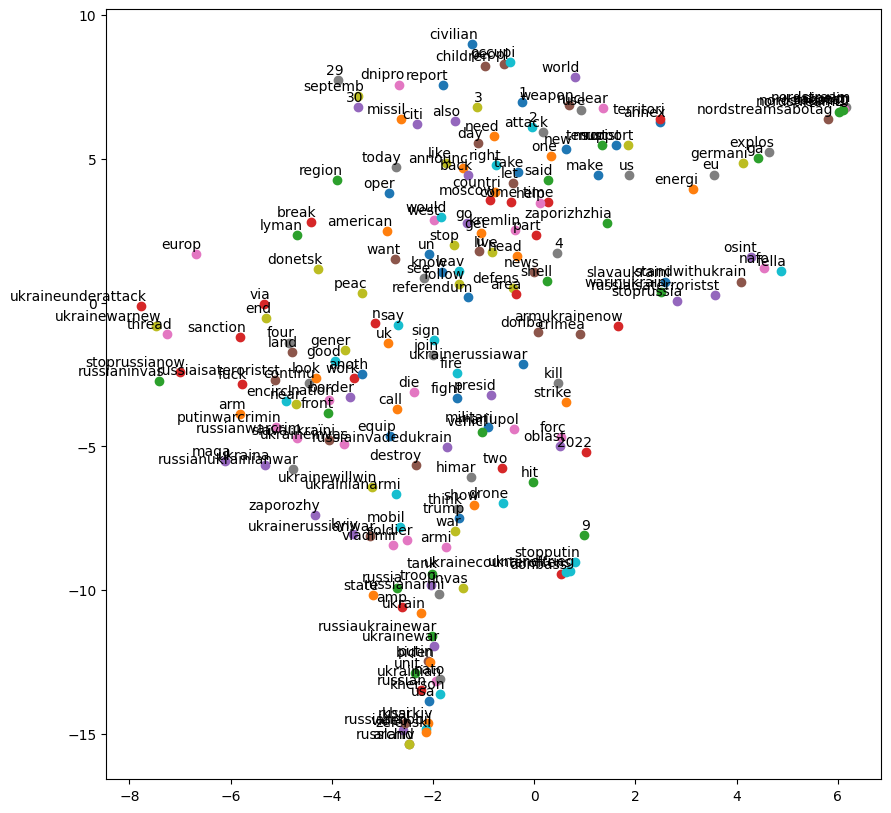

In [35]:
labels = []
word_vectors = []

# Extract word vectors from the model
word_vectors = [model.wv[word] for word in model.wv.index_to_key]
labels = model.wv.index_to_key

# Convert word vectors to a NumPy array
word_vectors = np.array(word_vectors)

# Create and fit a t-SNE model
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000, random_state=23)
new_values = tsne_model.fit_transform(word_vectors)

# Display a scatter
x = new_values[:, 0]
y = new_values[:, 1]

plt.figure(figsize=(10, 10))
for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(4, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()